In [145]:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.right = None
        self.left = None

In [146]:
class BST(TreeNode):
    def __init__(self, val, parent=None):
        super().__init__(val)
        self.parent = parent

In [147]:
def print_tree(tree, level=0, label='.'): 
    print(' ' * (level*2) + label + ':' , tree.val)
    for child, lbl in zip([tree.left, tree.right], ['L', 'R']):  # do for all children 
        if child is not None:
            print_tree(child, level+1, lbl)

In [148]:
def insert(self, val):
    if val < self.val:
        if self.left is None:
            new_node = BST(val, parent = self)
            self.left = new_node
        else:
            self.left.insert(val)
            
    elif val > self.val:
        if self.right is None:
            new_node = BST(val, parent = self)
            self.right = new_node
        else:
            self.right.insert(val)
            
BST.insert = insert

In [149]:
t = BST(12)

In [150]:
t.insert(8)
t.insert(14)
t.insert(6)
t.insert(9)

In [151]:
print_tree(t)

.: 12
  L: 8
    L: 6
    R: 9
  R: 14


In [152]:
def dfs_preorder(self):
    
    print(self.val)
    
    if self.left:
        self.left.dfs_preorder()
    
    if self.right:
        self.right.dfs_preorder()
        
    return

BST.dfs_preorder = dfs_preorder

In [153]:
t.dfs_preorder()

12
8
6
9
14


In [154]:
def dfs_inorder(self):
    
    if self.left:
        self.left.dfs_inorder()
        
    print(self.val)
    
    if self.right:
        self.right.dfs_inorder()
        
    return

BST.dfs_inorder = dfs_inorder

In [155]:
t.dfs_inorder()

6
8
9
12
14


In [156]:
def dfs_postorder(self):
    
    if self.left:
        self.left.dfs_postorder()
            
    if self.right:
        self.right.dfs_postorder()
        
    print(self.val)

    return

BST.dfs_postorder = dfs_postorder

In [157]:
t.dfs_postorder()

6
9
8
14
12


In [158]:
def bfs(self):
    lst = [self]
    
    while lst:
        current = lst.pop(0)
        print(current.val)
        
        if current.left:
            lst.append(current.left)
        
        if current.right:
            lst.append(current.right)
            
BST.bfs = bfs

In [159]:
t.bfs()

12
8
14
6
9


### Deletion in BST

In [632]:
class Dummy:
    f = False
d = Dummy()

def get_successor(self):
    self2 = self
    
    if self.right == None and self.left == None:
        return self2
    else:
        if self.left:
            self2 = self.left.get_successor()
            d.f = True
            return self2
        
        elif self.right:
            if d.f == True:
                return
            else:
                self2 = self.right.get_successor()
                return self2
    
BST.get_successor = get_successor

In [633]:
def delete(self, val):
    
    if self.val == val:
    
    
        # CASE 1 - only root node
        
        if self.parent is None and self.left is None and self.right is None:
            return None

        
        # CASE 2 - no child
        
        if self.left is None and self.right is None:   # if child node
            
            if self.parent.right:    
                if self.parent.right.val == val:  # if child node is on the right of parent
                    self.parent.right = None
             
            if self.parent.left:    
                if self.parent.left.val == val:   # if child node is on the left of parent
                    self.parent.left = None
        
        
       # CASE 3 - one child
    
        if self.left is None and self.right != None:   # if the node to be deleted has only one child on its right
            self.parent.right = self.right

        if self.left != None and self.right is None:   # if the node to be deleted has only one child on its left
            self.parent.left = self.left
         
        
        # CASE 4 - two children
        
        if self.right and self.left:
            
            successor = self.right.get_successor()   # find successor - left-most leaf from right subtree
            print(successor.val)
            self.delete(successor.val)
            self.val = successor.val
 
    else:
        if val < self.val:   # smaller value is on left side
            self.left.delete(val)

        if val > self.val:   # greater value is on right side
            self.right.delete(val)
    
    return

BST.delete = delete

In [634]:
t2 = BST(5)
t2.insert(7)
t2.insert(2)
t2.insert(1)
t2.insert(10)
t2.insert(3)
t2.insert(9)
t2.insert(11)
t2.insert(6)
print_tree(t2)

.: 5
  L: 2
    L: 1
    R: 3
  R: 7
    L: 6
    R: 10
      L: 9
      R: 11


In [635]:
t2.delete(5)

6


In [636]:
print_tree(t2)

.: 6
  L: 2
    L: 1
    R: 3
  R: 7
    R: 10
      L: 9
      R: 11


### Graphs

In [148]:
!pip install networkx

     |████████████████████████████████| 1.6 MB 1.2 MB/s eta 0:00:01


In [641]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [642]:
def draw_graph_with_nx(G): 
    pos = nx.spring_layout(G, iterations=200)
    options = {'node_color': 'white', 'alpha': 1, 'node_size': 2000, 'width': 0.002, 'font_color': 'darkred', 
               'font_size': 25, 'arrows': True, 'edge_color': 'brown',
               'arrowstyle': 'Fancy, head_length=1, head_width=1, tail_width=.4'
              }
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels,  **options)
    plt.show()

In [643]:
class Digraph:
    def __init__(self):
        self.g = {}
        
    def add_node(self,node):
        if node in self.g:
            raise ValueError("Source already exists")

        self.g[node] = []
        
    def add_edge(self,src,dest):
        if src not in self.g and dest not in self.g:
            raise ValueError('Source/Destination not found')

        edges = self.g[src]

        if dest not in edges:
            edges.append(dest)
        
        else:
            raise ValueError("Destination already exists")

    def draw_graph(self): 
        G = nx.DiGraph()
        for src in self.g: 
            G.add_node(src, label=src) 
            for dest in self.g[src]:
                G.add_edge(src, dest)
                
        draw_graph_with_nx(G)

In [645]:
g = Digraph()
g.add_node('Isd')
g.add_node('Pwr')
g.add_node('Grw')
g.add_node('Lhr')
g.add_node('Fsd')
# g.add_node('Fsd')

In [646]:
g.add_edge('Isd','Pwr')
g.add_edge('Isd','Lhr')

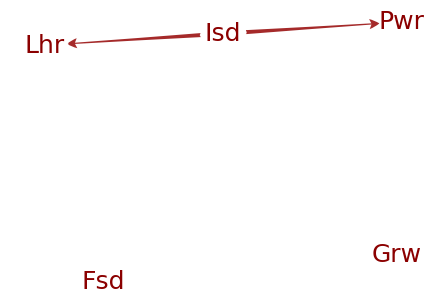

In [647]:
g.draw_graph()